In [2]:
import pandas as pd


df = pd.read_csv('CONTENT_INTERACTION/ViewingActivity.csv')

In [3]:
%matplotlib inline
import matplotlib

In [4]:
df.head(1)
list(df.columns)

['Profile Name',
 'Start Time',
 'Duration',
 'Attributes',
 'Title',
 'Supplemental Video Type',
 'Device Type',
 'Bookmark',
 'Latest Bookmark',
 'Country']

In [5]:
df_jack = df[df['Profile Name'] == "Jack"]

In [6]:
df_jack.head(1)
#df_jack.dtypes

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
7011,Jack,2022-09-26 20:36:05,00:00:05,Autoplayed: user action: None;,I AM A KILLER: Season 1_hook_03_16x9,HOOK,Roku Fruitland Sound Bar,00:00:05,00:00:05,GB (United Kingdom)


In [7]:
df_jack['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df_jack['Duration'] = pd.to_timedelta(df['Duration'])
#df_jack.dtypes
df_jack = df_jack.set_index('Start Time')
df_jack.index = df_jack.index.tz_convert('Europe/London')
df_jack = df_jack.reset_index()
#df_jack.head(2)


C:\Users\jackk\AppData\Local\Temp\ipykernel_30396\3102245785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jack['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
C:\Users\jackk\AppData\Local\Temp\ipykernel_30396\3102245785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jack['Duration'] = pd.to_timedelta(df['Duration'])


In [8]:
df_jack.dtypes

Start Time                 datetime64[ns, Europe/London]
Profile Name                                      object
Duration                                 timedelta64[ns]
Attributes                                        object
Title                                             object
Supplemental Video Type                           object
Device Type                                       object
Bookmark                                          object
Latest Bookmark                                   object
Country                                           object
dtype: object

In [9]:
# only the rows in which the Title column contains 'The Office (U.S.)'
office_jack = df_jack[df_jack['Title'].str.contains('The Office (U.S.)', regex=False)]

In [10]:
office_jack.shape
office_jack = office_jack[(office_jack['Duration'] > '0 days 00:01:00')]

In [11]:
#Add new columns that contains weekday and hour
office_jack['weekday'] = office_jack['Start Time'].dt.weekday
office_jack['hour'] = office_jack['Start Time'].dt.hour
office_jack.head(1)


,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,weekday,hour
19,2022-09-21 20:06:05+01:00,Jack,0 days 00:15:28,NaN,The Office (U.S.): Season 8: Lotto (Episode 3),NaN,Roku Fruitland Sound Bar,00:15:28,00:15:28,GB (United Kingdom),2,20


<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

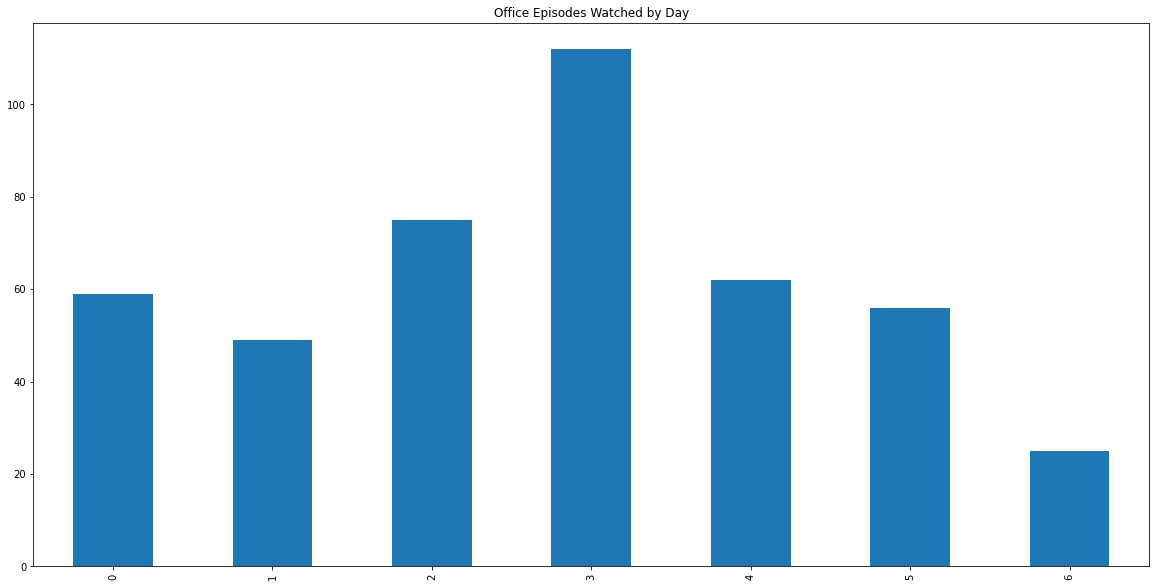

In [12]:
#Ordering the weekday Monday-Sunday
office_jack['weekday'] = pd.Categorical(office_jack['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
#New variable containing count of rows
office_jack_by_day = office_jack['weekday'].value_counts()
#Sort the counts by defined order
office_jack_by_day = office_jack_by_day.sort_index()
#plot data
office_jack_by_day.plot(kind='bar', figsize=(20,10),title='Office Episodes Watched by Day')

In [17]:
p_time_office = office_jack['Duration'].sum()/df_jack['Duration'].sum() * 100
print("The office has been watched for " + str(office_jack['Duration'].sum()) + " , which is " + str(round(p_time_office,2)) + "% of total watch time.")

The office has been watched for 5 days 18:13:15 , which is 5.1% of total watch time.


# Devices Used

In [59]:
devices_used = df_jack['Device Type'].unique()


In [60]:
print(devices_used)

['Roku Fruitland Sound Bar' 'Apple iPhone 11' 'Vestel MB211 Smart TV'
 'iPad Pro 9.7-Inch (Wi-Fi)' 'Firefox PC (Cadmium)' 'Chrome PC (Cadmium)'
 'Samsung 2017 Kant-M UHD TV Smart TV'
 'TiVo TiVo Virgin Media Series 6 MVPD STB' 'Apple TV 3 (revised)'
 'Safari MAC (Cadmium)' 'Google Chromecast V5 Streaming Stick'
 'Apple iPhone 7 (GSM)' 'Apple iPad 6th Gen 9.7 (Wi-Fi) iPad'
 'Microsoft Xbox One S' 'LG 2015 Mstar Low UHD TV'
 'TiVo Virgin Media Samsung DVR Set Top Box' 'Netflix Opera Other'
 'Youview British Telecom DTR-T2100 Set Top Box'
 'Android DefaultWidevineL3Phone Android Phone (samsung_SM-G935F)'
 'Android DefaultWidevineL3Phone Android Phone' 'iPad4 3G CDMA'
 'DefaultWidevineAndroidPhone' 'Apple iPad mini' 'FireTV Stick 2014' 'PC'
 'Google Chromecast streaming stick' 'Mobile' 'Microsoft Xbox 360']


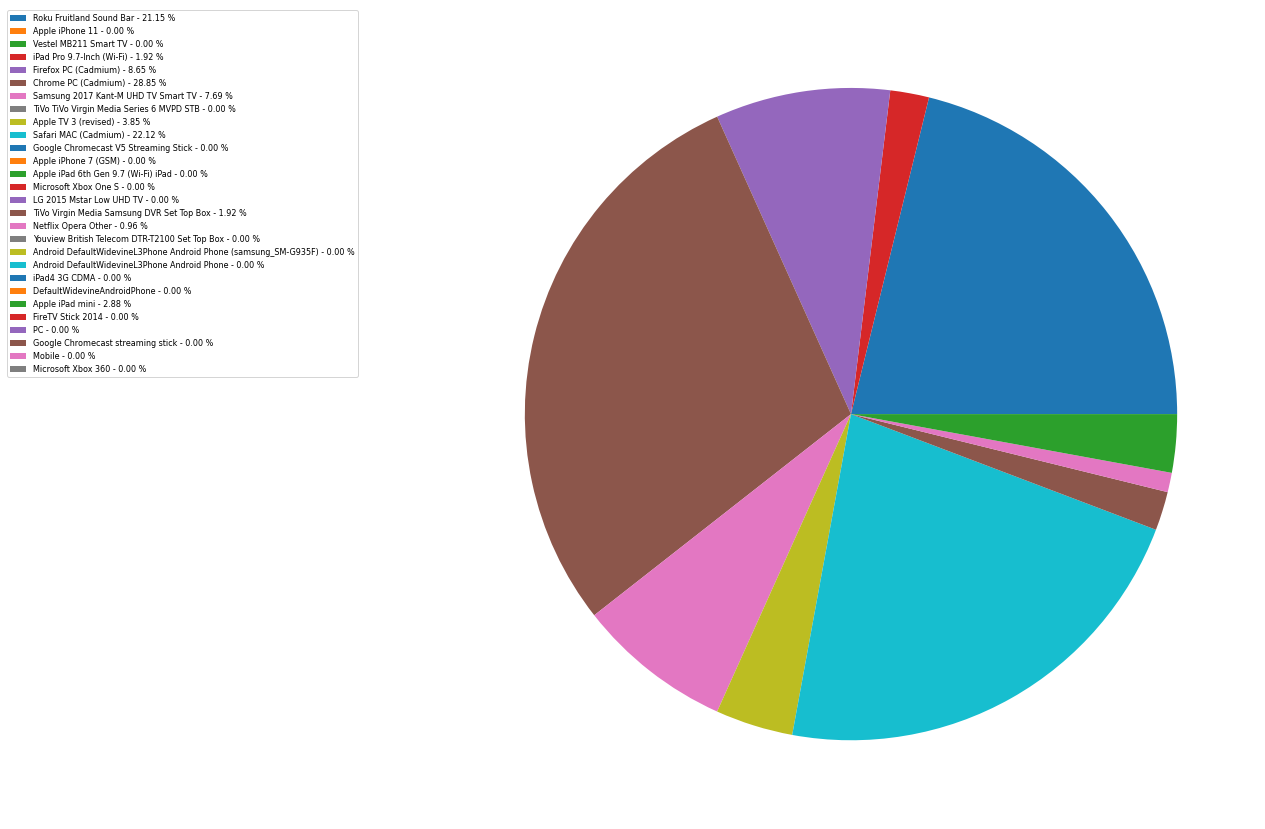

In [75]:
data = []
for i in range(len(devices_used)):
    data.append([devices_used[i], df_jack.loc[df_jack['Device Type'] == devices_used[i], 'Duration'].sum().days])

devices_duration =pd.DataFrame(data, columns=['Device Type','Duration'])
ax = devices_duration.plot(kind='pie', y='Duration',labels = None,legend=False,figsize=(15,15))
ax.yaxis.label.set_visible(False)
percent = 100.*devices_duration['Duration']/devices_duration['Duration'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(devices_duration['Device Type'], percent)]
ax.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)


In [12]:
reduced_jack['Title'].unique()

array(['DAHMER: Monster: The Jeffrey Dahmer Story: Lionel (Episode 8)',
       'DAHMER: Monster: The Jeffrey Dahmer Story: Cassandra (Episode 7)',
       'DAHMER: Monster: The Jeffrey Dahmer Story: Silenced (Episode 6)',
       ..., 'Paul Blart: Mall Cop', 'WALL-E', 'Cowboys & Aliens'],
      dtype=object)